# DengAI: Predicting Disease Spread

**Problem description**

Our goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

**Importing libraries**

We have used the Keras which is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. We have used it for the deep leraning tasks. Further we have used Matplot Library and Seabornlibrary  for plotting the graphs. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

The dataset consits following files ::

1.   Training Data Features	
The features for the training dataset.
2.   Training Data Labels	
The number of dengue cases for each row in the training dataset.
3.   Test Data Features	
The features for the testing dataset


In [ ]:
dengue_features_train_df = pd.read_csv("dengue_features_train.csv")
dengue_features_test_df = pd.read_csv("dengue_features_test.csv")
dengue_labels_train_df = pd.read_csv("dengue_labels_train.csv")

dengue_features_train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


**Data Analysis**

In [ ]:
dengue_features_train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
dengue_features_train_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


Getting the data types for the columns 

In [ ]:
dengue_features_train_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

**Checking weather the featues has missed values.**


In [ ]:
dengue_features_train_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

It seems column  `ndvi_ne`  has more missing values .  
**Fill the features by the mean**


In [ ]:
dengue_features_train_df["ndvi_ne"] = dengue_features_train_df["ndvi_ne"].fillna(dengue_features_train_df["ndvi_ne"].mean())
dengue_features_train_df["ndvi_nw"] = dengue_features_train_df["ndvi_nw"].fillna(dengue_features_train_df["ndvi_nw"].mean())
dengue_features_train_df["ndvi_se"] = dengue_features_train_df["ndvi_se"].fillna(dengue_features_train_df["ndvi_se"].mean())
dengue_features_train_df["ndvi_sw"] = dengue_features_train_df["ndvi_sw"].fillna(dengue_features_train_df["ndvi_sw"].mean())
dengue_features_train_df["precipitation_amt_mm"] = dengue_features_train_df["precipitation_amt_mm"].fillna(dengue_features_train_df["precipitation_amt_mm"].mean())
dengue_features_train_df["reanalysis_air_temp_k"] = dengue_features_train_df["reanalysis_air_temp_k"].fillna(dengue_features_train_df["reanalysis_air_temp_k"].mean())
dengue_features_train_df["reanalysis_avg_temp_k"] = dengue_features_train_df["reanalysis_avg_temp_k"].fillna(dengue_features_train_df["reanalysis_avg_temp_k"].mean())
dengue_features_train_df["reanalysis_dew_point_temp_k"] = dengue_features_train_df["reanalysis_dew_point_temp_k"].fillna(dengue_features_train_df["reanalysis_dew_point_temp_k"].mean())
dengue_features_train_df["reanalysis_max_air_temp_k"] = dengue_features_train_df["reanalysis_max_air_temp_k"].fillna(dengue_features_train_df["reanalysis_max_air_temp_k"].mean())
dengue_features_train_df["reanalysis_min_air_temp_k"] = dengue_features_train_df["reanalysis_min_air_temp_k"].fillna(dengue_features_train_df["reanalysis_min_air_temp_k"].mean())
dengue_features_train_df["reanalysis_precip_amt_kg_per_m2"] = dengue_features_train_df["reanalysis_precip_amt_kg_per_m2"].fillna(dengue_features_train_df["reanalysis_precip_amt_kg_per_m2"].mean())
dengue_features_train_df["reanalysis_relative_humidity_percent"] = dengue_features_train_df["reanalysis_relative_humidity_percent"].fillna(dengue_features_train_df["reanalysis_relative_humidity_percent"].mean())
dengue_features_train_df["reanalysis_sat_precip_amt_mm"] = dengue_features_train_df["reanalysis_sat_precip_amt_mm"].fillna(dengue_features_train_df["reanalysis_sat_precip_amt_mm"].mean())
dengue_features_train_df["reanalysis_specific_humidity_g_per_kg"] = dengue_features_train_df["reanalysis_specific_humidity_g_per_kg"].fillna(dengue_features_train_df["reanalysis_specific_humidity_g_per_kg"].mean())
dengue_features_train_df["reanalysis_tdtr_k"] = dengue_features_train_df["reanalysis_tdtr_k"].fillna(dengue_features_train_df["reanalysis_tdtr_k"].mean())
dengue_features_train_df["station_avg_temp_c"] = dengue_features_train_df["station_avg_temp_c"].fillna(dengue_features_train_df["station_avg_temp_c"].mean())
dengue_features_train_df["station_diur_temp_rng_c"] = dengue_features_train_df["station_diur_temp_rng_c"].fillna(dengue_features_train_df["station_diur_temp_rng_c"].mean())
dengue_features_train_df["station_max_temp_c"] = dengue_features_train_df["station_max_temp_c"].fillna(dengue_features_train_df["station_max_temp_c"].mean())
dengue_features_train_df["station_min_temp_c"] = dengue_features_train_df["station_min_temp_c"].fillna(dengue_features_train_df["station_min_temp_c"].mean())
dengue_features_train_df["station_precip_mm"] = dengue_features_train_df["station_precip_mm"].fillna(dengue_features_train_df["station_precip_mm"].mean())

**Checking again to verify whetehr there is any null values**

In [ ]:
dengue_features_train_df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [ ]:
dengue_features_train_df['total_cases'] = dengue_labels_train_df['total_cases']
dengue_features_train__corr_df=dengue_features_train_df.drop('week_start_date', axis = 1)
dengue_features_train__corr_df=dengue_features_train__corr_df.drop('year', axis = 1)
dengue_features_train__corr_df=dengue_features_train__corr_df.drop('weekofyear', axis = 1)
dengue_features_train__corr_df=dengue_features_train__corr_df.drop('city', axis = 1)
dengue_features_train_corr = dengue_features_train__corr_df.corr()

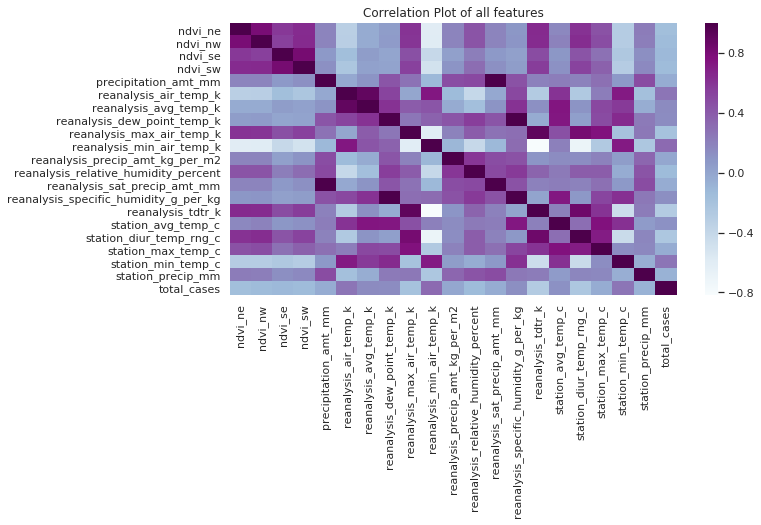

In [ ]:
sns.set() 
plt.figure(figsize=(10, 5))
plt.title('Correlation Plot of all features')
ax = sns.heatmap(dengue_features_train_corr,cmap="BuPu")


**Observation from the dataset**

No variables are exceptionally good at predicting the label (total cases)

The first 4 variables (Normalized Difference Vegetation Index) variables appears to be very weakly correlated with the other variables. They do not appear to be very useful in predicting the labels.

Most of temperature variables in both datasets appear to be strongly correlated with one another.

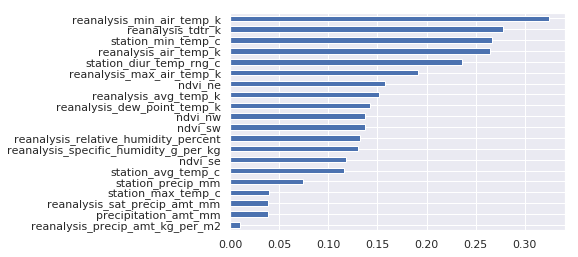

In [ ]:
sns.set(font_scale = 1.0)
(abs(dengue_features_train_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())



it appears that certain variables feature prominently on both bar charts, suggesting that they may be commmon drivers of dengue cases. For example, specific humidity (in g/kg), dew point temperature (in K)
, minimum air temperature (in K) and  minimum air temperature (in C) appear to be relatively strongly correlated with the total_cases label.


**Splitting into training, cross-validation and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split





In [ ]:
X=dengue_features_train_df.iloc[:,4:-1]
y=dengue_features_train_df.iloc[:,-1]
X.shape

(1456, 19)

In [ ]:
new_x=[]
for index, row in X.iterrows():
    app=[]
    for i in range(X.shape[1]):
      app.append([row[i]])
    new_x.append(app)
X=np.array(new_x)


In [ ]:
X.shape

(1456, 19, 1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score 
from datetime import datetime, timedelta

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[19]) 

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[19])
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(train_X, train_y, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


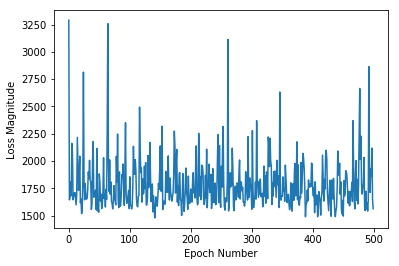

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[19])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history= model.fit(train_X, train_y, epochs=500, verbose=True)

Epoch 1/500
1019/1019 [==============================] - 0s 275us/sample - loss: 4313.8035
Epoch 2/500
1019/1019 [==============================] - 0s 36us/sample - loss: 1670.1517
Epoch 3/500
1019/1019 [==============================] - 0s 36us/sample - loss: 1634.3255
Epoch 4/500
1019/1019 [==============================] - 0s 36us/sample - loss: 1616.7635
Epoch 5/500
1019/1019 [==============================] - 0s 34us/sample - loss: 1622.4976
Epoch 6/500
1019/1019 [==============================] - 0s 35us/sample - loss: 1583.4155
Epoch 7/500
1019/1019 [==============================] - 0s 36us/sample - loss: 1627.2512
Epoch 8/500
1019/1019 [==============================] - 0s 35us/sample - loss: 1667.1458
Epoch 9/500
1019/1019 [==============================] - 0s 36us/sample - loss: 1662.2897
Epoch 10/500
1019/1019 [==============================] - 0s 36us/sample - loss: 2049.1724
Epoch 11/500
1019/1019 [==============================] - 0s 37us/sample - loss: 1696.3779
Epoch 1

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform

In [ ]:
def LSTMmodel(input_shape):
    input_ = Input(input_shape, dtype='float32')
    # Be careful, the returned output should be a batch of sequences.
    X = LSTM(16, return_sequences=False)(input_)
    # Add dropout with a probability of 0.5
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    X = Dense(16)(X)
    X = Dense(1)(X)
    model = Model(inputs=input_, outputs=X)
    return model

In [ ]:
model = LSTMmodel((19,1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 19, 1)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history= model.fit(train_X, train_y, epochs=200, verbose=True)

Epoch 1/200
1019/1019 [==============================] - 1s 1ms/step - loss: 3616.6135 - acc: 0.0167
Epoch 2/200
1019/1019 [==============================] - 0s 301us/step - loss: 3467.6712 - acc: 0.0020
Epoch 3/200
1019/1019 [==============================] - 0s 287us/step - loss: 3291.4489 - acc: 0.0020
Epoch 4/200
1019/1019 [==============================] - 0s 288us/step - loss: 3074.4033 - acc: 9.8135e-04
Epoch 5/200
1019/1019 [==============================] - 0s 291us/step - loss: 2784.9029 - acc: 0.0059
Epoch 6/200
1019/1019 [==============================] - 0s 296us/step - loss: 2514.5328 - acc: 0.0029
Epoch 7/200
1019/1019 [==============================] - 0s 298us/step - loss: 2287.1500 - acc: 0.0000e+00
Epoch 8/200
1019/1019 [==============================] - 0s 352us/step - loss: 2145.5651 - acc: 0.0029
Epoch 9/200
1019/1019 [==============================] - 0s 302us/step - loss: 2055.2150 - acc: 0.0000e+00
Epoch 10/200
1019/1019 [==============================] - 0s 29